In [1]:
import numpy as np
import pandas as pd
import ast
import matplotlib.pyplot as plt
from matplotlib import gridspec

In [2]:
%matplotlib inline

In [3]:
filenames = ['data/2017-05-22-measurements-phenotype_evaluation/single_objective/graphs_fix/HvsL.txt',
             'data/2017-05-22-measurements-phenotype_evaluation/single_objective/graphs_fix/HvsR.txt',
             'data/2017-05-22-measurements-phenotype_evaluation/single_objective/graphs_fix/MvsL.txt',
             'data/2017-05-22-measurements-phenotype_evaluation/single_objective/graphs_fix/MvsR.txt'
            ]
names = ['High vs Legacy',
         'High vs Random',
         'Medium vs Legacy',
         'Medium vs Random'
        ]
scores = []

In [4]:
def parse(filename):
    with open(filename) as f:
        score = ast.literal_eval(f.readline())

    scores.append(score)

In [5]:
[parse(filename) for filename in filenames];

In [6]:
def clear_sco(sss):
    clear_scores = []
    for file in sss:
        kk = []
        for s in file:
            kk.append(s[0])
        clear_scores.append(kk)
        
    return clear_scores

In [7]:
final_scores = clear_sco(scores)

In [8]:
df = pd.DataFrame(final_scores, index=names, columns=list(range(100)))
df = df.transpose()

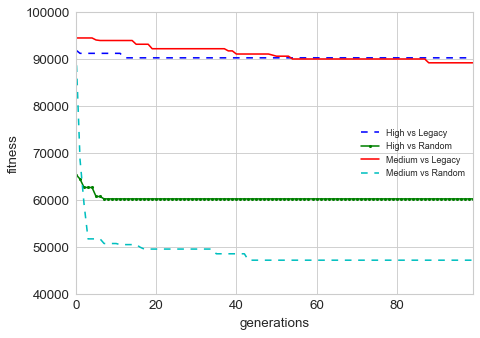

In [44]:
plt.style.use('seaborn-paper')
ax = df.plot(style=['--', '.-', '-', '--'])
ax.set_ylabel('fitness', fontsize=12)
ax.set_xlabel('generations', fontsize=12)
ax.tick_params(labelsize=12)

In [46]:
ax.get_figure().savefig('so_fitness_bests.png', bbox_inches='tight', dpi=400)